# Part 1: WeatherPy
### Uses citipy and Open Weather Map API to find weather details for a list of random cities, and discovers any correlation between the weather patterns and the location of the city.

## 3 Observable Trends:
1. As shown in the scatter plot: ***Temperature vs. Latitude***, the temperature of a given location correlates with its latitude. 
> As you move from *-60 to 20 degrees latitude*, the temperature increases from **40 to 100 degrees F**, and as you move from *20 to 80 degrees latitude*, the temperature decreases from **100 to below 0 degrees F**. This trend proves what we already know about the temperature as you move towards and away from the equator (0 degrees latitude).


2. The ***Humidity vs. Latitude***, ***Cloudiness vs. Latitude***, and ***Wind Speed vs. Latitude*** scatter plots show that these factors do not have significant correlations between each other. They show that the degree of latitude you are near cannot easily predict the humidity, cloudiness, or wind speed.

3. When the hemispheres were divided into the **Northern Hemisphere and Southern Hemispheres**:

> The **Northern Hemisphere** seemed to have a ***more significant relationship*** between *temperature and latitude*, while the **Southern Hemisphere** also seemed to have a significant relationship, but its r-value was much lower than the Northern Hemisphere's r-value.

> The wind speed in the Northern Hemisphere also peaked at **40 mph**, while the wind speed in the Southern Hemisphere peaked at **25 mph**. This could suggest that the Northern Hemisphere is more likely to have higher wind speeds. Though, the difference in speeds could be caused by a difference in the number of datapoints for each hemisphere.

In [1]:
#!pip install citipy

In [1]:
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
import time
from scipy import stats
from scipy.stats import linregress
# Import api key
from config import api_key
# Import citipy for city names by long. and lat.
from citipy import citipy

# Import style
%matplotlib inline
from matplotlib import style
style.use('seaborn')

In [2]:
# Define ranges for longitude and latitude
latitude_range = (-90,90)
longitude_range = (-180,180)

In [3]:
# Create lists for coordinates and cities
lat_long_coord = []
cities = []

# Create random latitude and longitude combinations - 1500 at the end
latitude = np.random.uniform(latitude_range[0], latitude_range[1], size=1500)
longitude = np.random.uniform(longitude_range[0], longitude_range[1], size=1500)
lat_long_coord = zip(latitude, longitude)

# Build a for loop to find city names for random coordinates
for lat_long in lat_long_coord:
    city = citipy.nearest_city(lat_long[0], lat_long[1])
    city = city.city_name
    
    # Add the city to a list if it is unique
    if city not in cities:
        cities.append(city)

In [4]:
# Check length of the list
len(cities)
#print(cities)

608

In [5]:
# Create base url
base_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}"
# define units
units = "imperial"

# Build query url with units
query_url = f"{base_url}&units={units}&q="

In [6]:
# Create lists for results
temperature = []
humidity = []
cloudiness = []
wind_speed = []
countries = []
dates = []
cities_reduced = []
latitude_reduced = []
longitude_reduced = []

In [7]:
# Loop through cities to find results
index = 0

for city in cities:
    
    # Create url for city
    full_url = f"{query_url}{city}"
    index += 1
    
    try:
    # Find json response for city
        response = requests.get(full_url).json()
        city_number = response["id"]
        
        # Find data to append for each city
        lat = response["coord"]["lat"]
        long = response["coord"]["lon"]
        temp_max = response["main"]["temp_max"]
        humid = response["main"]["humidity"]
        clouds = response["clouds"]["all"]
        wind = response["wind"]["speed"]
        country = response["sys"]["country"]
        weather_date = response["dt"]
        
        
         # Print text about: Append results
        print(f"City {index} of {len(cities)}: {city} found. City Number: {city_number}. Appending results.")
        
        # Append all results
        cities_reduced.append(city)
        latitude_reduced.append(lat)
        longitude_reduced.append(long)
        temperature.append(temp_max)
        humidity.append(humid)
        cloudiness.append(clouds)
        wind_speed.append(wind)
        countries.append(country)
        dates.append(weather_date)
        
        
    except KeyError:
        print(f"{city} not found.")
        

City 1 of 608: nouadhibou found. City Number: 2377457. Appending results.
City 2 of 608: cape town found. City Number: 3369157. Appending results.
City 3 of 608: avarua found. City Number: 4035715. Appending results.
City 4 of 608: nawabganj found. City Number: 1337240. Appending results.
City 5 of 608: bluefield found. City Number: 4799622. Appending results.
City 6 of 608: new norfolk found. City Number: 2155415. Appending results.
City 7 of 608: carnarvon found. City Number: 2074865. Appending results.
City 8 of 608: hobart found. City Number: 2163355. Appending results.
City 9 of 608: bredasdorp found. City Number: 1015776. Appending results.
City 10 of 608: ushuaia found. City Number: 3833367. Appending results.
City 11 of 608: tommot found. City Number: 2015179. Appending results.
City 12 of 608: chuy found. City Number: 3443061. Appending results.
City 13 of 608: thompson found. City Number: 6165406. Appending results.
City 14 of 608: hilo found. City Number: 5855927. Appending 

City 119 of 608: beringovskiy found. City Number: 2126710. Appending results.
City 120 of 608: kapaa found. City Number: 5848280. Appending results.
City 121 of 608: saanen found. City Number: 2658904. Appending results.
City 122 of 608: high level found. City Number: 5975004. Appending results.
City 123 of 608: beloha found. City Number: 1067565. Appending results.
saleaula not found.
samusu not found.
City 126 of 608: mangrol found. City Number: 1263752. Appending results.
City 127 of 608: oxford found. City Number: 2640729. Appending results.
City 128 of 608: mamlyutka found. City Number: 1521153. Appending results.
City 129 of 608: haines junction found. City Number: 5969025. Appending results.
City 130 of 608: katsuura found. City Number: 2112309. Appending results.
City 131 of 608: tuktoyaktuk found. City Number: 6170031. Appending results.
taolanaro not found.
City 133 of 608: lebedyn found. City Number: 613273. Appending results.
City 134 of 608: upernavik found. City Number: 3

City 238 of 608: linjiang found. City Number: 2036069. Appending results.
City 239 of 608: lebu found. City Number: 3883457. Appending results.
City 240 of 608: jalu found. City Number: 86049. Appending results.
meyungs not found.
City 242 of 608: issaquah found. City Number: 5798487. Appending results.
City 243 of 608: carutapera found. City Number: 3402648. Appending results.
City 244 of 608: tezu found. City Number: 1254709. Appending results.
City 245 of 608: dasoguz found. City Number: 601734. Appending results.
City 246 of 608: kemijarvi found. City Number: 653272. Appending results.
City 247 of 608: boende found. City Number: 218680. Appending results.
City 248 of 608: muyezerskiy found. City Number: 524100. Appending results.
City 249 of 608: broken hill found. City Number: 2173911. Appending results.
City 250 of 608: marianske lazne found. City Number: 3071024. Appending results.
City 251 of 608: charlestown found. City Number: 2171766. Appending results.
City 252 of 608: nars

City 357 of 608: taoudenni found. City Number: 2450173. Appending results.
City 358 of 608: nicoya found. City Number: 3622716. Appending results.
City 359 of 608: andreapol found. City Number: 582105. Appending results.
City 360 of 608: saint-augustin found. City Number: 6137462. Appending results.
City 361 of 608: praya found. City Number: 3374333. Appending results.
City 362 of 608: kulhudhuffushi found. City Number: 1337613. Appending results.
City 363 of 608: kodinsk found. City Number: 1503037. Appending results.
City 364 of 608: swan hill found. City Number: 2147756. Appending results.
City 365 of 608: vytegra found. City Number: 469960. Appending results.
City 366 of 608: kentau found. City Number: 1522751. Appending results.
City 367 of 608: asfi found. City Number: 2537881. Appending results.
City 368 of 608: bima found. City Number: 1648759. Appending results.
City 369 of 608: erenhot found. City Number: 2037485. Appending results.
City 370 of 608: kijang found. City Number:

City 474 of 608: san carlos found. City Number: 3628503. Appending results.
City 475 of 608: labuhan found. City Number: 8079926. Appending results.
City 476 of 608: champerico found. City Number: 3598787. Appending results.
City 477 of 608: gonen found. City Number: 746574. Appending results.
City 478 of 608: waipawa found. City Number: 2206874. Appending results.
City 479 of 608: sanming found. City Number: 1796663. Appending results.
City 480 of 608: mildura found. City Number: 2157698. Appending results.
City 481 of 608: altay found. City Number: 1529651. Appending results.
City 482 of 608: jaciara found. City Number: 3460355. Appending results.
City 483 of 608: kolpny found. City Number: 546092. Appending results.
City 484 of 608: banda aceh found. City Number: 1215502. Appending results.
City 485 of 608: broome found. City Number: 5110365. Appending results.
City 486 of 608: los llanos de aridane found. City Number: 2514651. Appending results.
City 487 of 608: joacaba found. City

City 592 of 608: zhuhai found. City Number: 1790437. Appending results.
City 593 of 608: patnos found. City Number: 302819. Appending results.
City 594 of 608: talnakh found. City Number: 1490256. Appending results.
City 595 of 608: batetskiy found. City Number: 578732. Appending results.
City 596 of 608: bogorodskoye found. City Number: 575521. Appending results.
City 597 of 608: vila do maio found. City Number: 3374120. Appending results.
City 598 of 608: naze found. City Number: 1855540. Appending results.
City 599 of 608: havoysund found. City Number: 779622. Appending results.
City 600 of 608: dali found. City Number: 1814093. Appending results.
City 601 of 608: nicolas bravo found. City Number: 3522742. Appending results.
City 602 of 608: khandyga found. City Number: 2022773. Appending results.
umzimvubu not found.
artyk not found.
City 605 of 608: lisakovsk found. City Number: 1521315. Appending results.
City 606 of 608: saint-francois found. City Number: 2980080. Appending resu

In [8]:
# Create DataFrame from series
weather_data = pd.DataFrame({
    "City": cities_reduced,
    "Latitude": latitude_reduced,
    "Longitude": longitude_reduced,
    "Max Temp.": temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": countries,
    "Date": dates
})
#weather_data = pd.DataFrame(weather_data)

# Get HTML for dataframe table
html = weather_data.to_html()
print(html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>City</th>
      <th>Latitude</th>
      <th>Longitude</th>
      <th>Max Temp.</th>
      <th>Humidity</th>
      <th>Cloudiness</th>
      <th>Wind Speed</th>
      <th>Country</th>
      <th>Date</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>nouadhibou</td>
      <td>20.9310</td>
      <td>-17.0347</td>
      <td>69.78</td>
      <td>88</td>
      <td>0</td>
      <td>14.97</td>
      <td>MR</td>
      <td>1632522604</td>
    </tr>
    <tr>
      <th>1</th>
      <td>cape town</td>
      <td>-33.9258</td>
      <td>18.4232</td>
      <td>57.11</td>
      <td>84</td>
      <td>0</td>
      <td>2.30</td>
      <td>ZA</td>
      <td>1632522418</td>
    </tr>
    <tr>
      <th>2</th>
      <td>avarua</td>
      <td>-21.2078</td>
      <td>-159.7750</td>
      <td>77.05</td>
      <td>50</td>
      <td>92</td>
      <td>5.75</td>
      <td>CK</td>
      <

In [9]:
# Convert Unix timestamp to readable date using datetime module
from datetime import datetime

weather_data["Date Converted"] = pd.to_datetime(weather_data["Date"], unit='s')

dates_converted = weather_data["Date Converted"]

In [10]:
# Display converted time
weather_data

,City,Latitude,Longitude,Max Temp.,Humidity,Cloudiness,Wind Speed,Country,Date,Date Converted
0,nouadhibou,20.9310,-17.0347,69.78,88,0,14.97,MR,1632522604,2021-09-24 22:30:04
1,cape town,-33.9258,18.4232,57.11,84,0,2.30,ZA,1632522418,2021-09-24 22:26:58
2,avarua,-21.2078,-159.7750,77.05,50,92,5.75,CK,1632522341,2021-09-24 22:25:41
3,nawabganj,24.5911,88.2710,80.80,81,12,0.63,BD,1632522606,2021-09-24 22:30:06
4,bluefield,37.2698,-81.2223,67.66,46,1,1.99,US,1632522417,2021-09-24 22:26:57
...,...,...,...,...,...,...,...,...,...,...
554,khandyga,62.6667,135.6000,43.50,82,99,6.35,RU,1632522888,2021-09-24 22:34:48
555,lisakovsk,52.5369,62.4936,42.03,51,96,8.46,KZ,1632522889,2021-09-24 22:34:49
556,saint-francois,46.4154,3.9054,58.44,94,0,1.14,FR,1632522889,2021-09-24 22:34:49
557,cururupu,-1.8283,-44.8683,75.54,87,73,3.51,BR,1632522889,2021-09-24 22:34:49


In [11]:
# Output dataframe to csv
weather_data.to_csv("./OutputData/cities_weather_data.csv", encoding="utf-8", index=False)

In [12]:
# Bring dataframe back in
weather_data_df = pd.read_csv("./OutputData/cities_weather_data.csv")

# Remove Unix Timestamp
weather_data_df = weather_data_df[["City", "Latitude", "Longitude", "Max Temp.", "Humidity", "Cloudiness",
                                  "Wind Speed", "Country", "Date Converted"]]
# Rename column
weather_data_df = weather_data_df.rename(columns = {"Date Converted": "Date"})

weather_data_df

,City,Latitude,Longitude,Max Temp.,Humidity,Cloudiness,Wind Speed,Country,Date
0,nouadhibou,20.9310,-17.0347,69.78,88,0,14.97,MR,2021-09-24 22:30:04
1,cape town,-33.9258,18.4232,57.11,84,0,2.30,ZA,2021-09-24 22:26:58
2,avarua,-21.2078,-159.7750,77.05,50,92,5.75,CK,2021-09-24 22:25:41
3,nawabganj,24.5911,88.2710,80.80,81,12,0.63,BD,2021-09-24 22:30:06
4,bluefield,37.2698,-81.2223,67.66,46,1,1.99,US,2021-09-24 22:26:57
...,...,...,...,...,...,...,...,...,...
554,khandyga,62.6667,135.6000,43.50,82,99,6.35,RU,2021-09-24 22:34:48
555,lisakovsk,52.5369,62.4936,42.03,51,96,8.46,KZ,2021-09-24 22:34:49
556,saint-francois,46.4154,3.9054,58.44,94,0,1.14,FR,2021-09-24 22:34:49
557,cururupu,-1.8283,-44.8683,75.54,87,73,3.51,BR,2021-09-24 22:34:49


In [13]:
# Find max and min of Humidity
weather_data_df["Humidity"].describe()

count    559.000000
mean      72.978533
std       20.725106
min       11.000000
25%       63.500000
50%       79.000000
75%       88.000000
max      100.000000
Name: Humidity, dtype: float64

## Temperature vs. Latitude

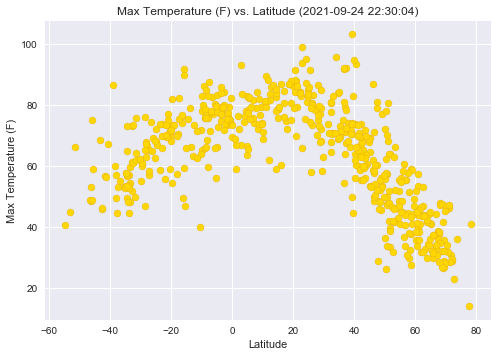

In [20]:
style.use('seaborn')
# Create Scatter Plot for Temp vs Lat
plt.scatter(weather_data_df["Latitude"], weather_data_df["Max Temp."], marker = "o", color="gold", edgecolors="goldenrod")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"Max Temperature (F) vs. Latitude ({dates_converted[0]})")
#plt.grid()
plt.savefig("./Images/temp_lat.png", bbox_inches="tight")
plt.show()

### Analysis:
This scatter plot is analyzing the correlation between the ***latitude*** of a city and the ***max temperature in degrees Fahrenheit*** for that location on a given day. The graph suggests that there is a relationship between these two factors, since they fall along the same line. It shows that as you move from *-60 to 20 degrees latitude*, the temperature increases from 40 to 100 degrees F, and as you move from *20 to 80 degrees latitude*, the temperature decreases from 100 to below 0 degrees F. This suggests that the equator (at *0 degrees latitude*) is where the temperature is the hottest. 

## Humidity vs. Latitude

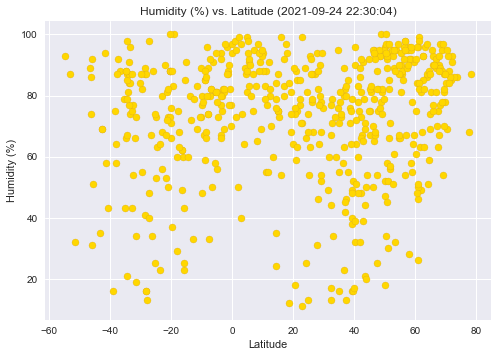

In [21]:
# Create Scatter Plot for Humidity vs Lat
plt.scatter(weather_data_df["Latitude"], weather_data_df["Humidity"], marker = "o", color="gold", edgecolors="goldenrod")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Humidity (%) vs. Latitude ({dates_converted[0]})")
plt.savefig("./Images/humidity_lat.png", bbox_inches="tight")
plt.show()

### Analysis: 
This scatter plot is analyzing the correlation between the ***latitude*** of a city and the ***percentage of humidity*** for that location on a given day. The graph suggests that there may not be a significant relationship between these two factors, since they do not follow a line, and show no apparent pattern. This may show that the **humidity** may be consistently higher in the southern hemisphere (below 0 degrees latitude), and rarely reaching below 20% humidity, in comparison to the northern hemisphere.

## Cloudiness vs. Latitude

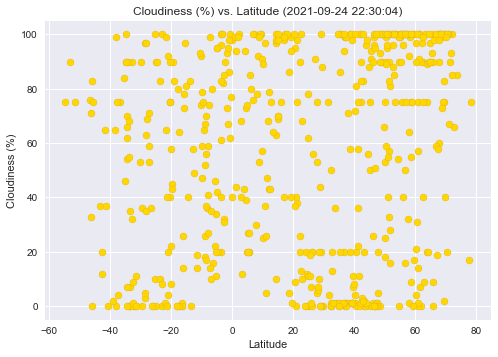

In [22]:
# Create Scatter Plot for Cloudiness vs Lat
plt.scatter(weather_data_df["Latitude"], weather_data_df["Cloudiness"], marker = "o", color="gold", edgecolors="goldenrod")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Cloudiness (%) vs. Latitude ({dates_converted[0]})")
plt.savefig("./Images/cloudiness_lat.png", bbox_inches="tight")
plt.show()

### Analysis:
This scatter plot is analyzing the correlation between the ***latitude*** of a city and the ***percentage of cloudiness*** for that location on a given day. The graph suggests that there may not be a significant relationship between these two factors, since they do not follow a line, and show no apparent pattern. This shows that the **percentage of cloudiness** cannot be determined by where you are, whether in the southern or northern hemisphere. 

## Wind Speed vs. Latitude

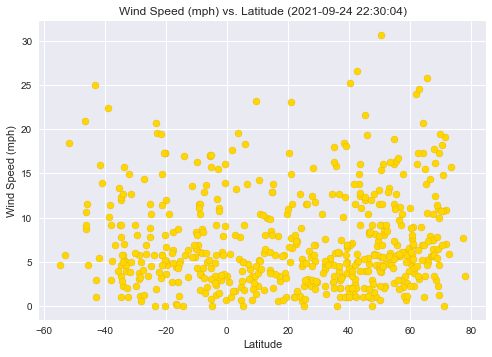

In [23]:
# Create Scatter Plot for Wind Speed vs Lat
plt.scatter(weather_data_df["Latitude"], weather_data_df["Wind Speed"], marker = "o", color="gold", edgecolors="goldenrod")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Wind Speed (mph) vs. Latitude ({dates_converted[0]})")
plt.savefig("./Images/windspeed_lat.png", bbox_inches="tight")
plt.show()

### Analysis:
This scatter plot is analyzing the correlation between the ***latitude*** of a city and the ***wind speed in miles per hour*** for that location on a given day. The graph suggests that there may not be a significant relationship between these two factors, since they do not follow a line, and show no apparent pattern. This shows that the **wind speed** cannot be determined by where you are, whether in the southern or northern hemisphere. For the most part, on this given day, the wind speeds were relatively low (most being below 20 mph) across both hemispheres.

In [44]:
# Create separate northern hemisphere dataframe
northern_hem_df = weather_data_df.loc[weather_data_df["Latitude"] >= 0, :]
northern_hem_df

,City,Latitude,Longitude,Max Temp.,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.0707,172.7902,81.84,80,100,18.30,KI,2021-05-25 22:16:56
1,barrow,71.2906,-156.7887,26.62,86,90,6.91,US,2021-05-25 22:16:56
3,tasiilaq,65.6145,-37.6368,37.56,89,100,46.57,GL,2021-05-25 22:16:57
5,seoul,37.5683,126.9778,56.64,68,100,4.43,KR,2021-05-25 22:14:36
8,victoria,22.2855,114.1577,85.32,90,82,10.58,HK,2021-05-25 22:13:57
...,...,...,...,...,...,...,...,...,...
524,penzance,50.1186,-5.5371,49.21,94,100,12.48,GB,2021-05-25 22:21:52
526,tommot,58.9564,126.2925,46.87,80,100,1.99,RU,2021-05-25 22:21:53
527,dosso,13.0490,3.1937,97.43,19,93,5.79,NE,2021-05-25 22:19:01
529,yangjiang,21.8500,111.9667,78.03,91,52,2.39,CN,2021-05-25 22:21:54


In [45]:
# Create separate southern hemisphere dataframe
southern_hem_df = weather_data_df.loc[weather_data_df["Latitude"] < 0, :]
southern_hem_df

,City,Latitude,Longitude,Max Temp.,Humidity,Cloudiness,Wind Speed,Country,Date
2,atuona,-9.8000,-139.0333,79.93,61,30,13.98,PF,2021-05-25 22:15:13
4,puerto ayora,-0.7393,-90.3518,84.16,87,35,8.01,EC,2021-05-25 22:16:58
6,hobart,-42.8794,147.3294,50.25,82,0,3.00,AU,2021-05-25 22:14:02
7,busselton,-33.6500,115.3333,44.04,77,100,9.60,AU,2021-05-25 22:16:59
14,hermanus,-34.4187,19.2345,57.90,74,61,7.52,ZA,2021-05-25 22:17:01
...,...,...,...,...,...,...,...,...,...
522,kaoma,-14.7833,24.8000,53.49,66,0,5.30,ZM,2021-05-25 22:21:51
525,sao joao da barra,-21.6403,-41.0511,69.30,70,55,9.71,BR,2021-05-25 22:21:52
528,paita,-5.0892,-81.1144,71.87,80,20,14.58,PE,2021-05-25 22:21:54
530,sambava,-14.2667,50.1667,69.26,87,10,6.71,MG,2021-05-25 22:21:55


# Linear Regression:

# Temperature vs. Latitude

## Northern Hemisphere:

In [66]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_hem_df["Latitude"], northern_hem_df["Max Temp."])

# Get regression values
regress_values = northern_hem_df["Latitude"] * slope + intercept
print(regress_values)

# Create line equation string
line_eq = f'y = {slope:1.2f}x + {intercept:1.2f}'
print(line_eq)

0      92.930680
1      40.516164
3      44.877209
5      66.425584
8      78.167621
         ...    
524    56.782974
526    49.992741
527    85.264181
529    78.502223
532    42.127555
Name: Latitude, Length: 364, dtype: float64
y = -0.77x + 95.29


The r-value is: 0.6373973068425414


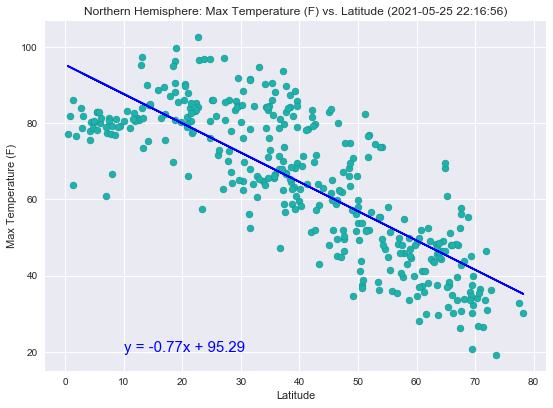

In [67]:
# Create Plot: Temp vs Lat (Northern)
plt.figure(figsize=(8,6))
plt.scatter(northern_hem_df["Latitude"], northern_hem_df["Max Temp."], marker = "o", color="lightseagreen", edgecolor="teal")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"Northern Hemisphere: Max Temperature (F) vs. Latitude ({dates_converted[0]})")

# Label plot and annotate the line equation
plt.plot(northern_hem_df["Latitude"], regress_values,"b-")
plt.annotate(line_eq, (10,20), fontsize=15, color="b")

# Print r square value
print(f'The r-value is: {rvalue**2}')

plt.savefig("./Images/temp_lat_north.png")

# Show plot
plt.show()

## Southern Hemisphere:

In [48]:
# Perform a linear regression on temperature vs. latitude: Southern
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_hem_df["Latitude"], southern_hem_df["Max Temp."])

# Get regression values
regress_values = southern_hem_df["Latitude"] * slope + intercept
print(regress_values)

# Create line equation string
line_eq = f'y = {slope:1.2f}x + {intercept:1.2f}'
print(line_eq)

2      73.714191
4      80.572669
6      48.674808
7      55.660983
14     55.079117
         ...    
522    69.942092
525    64.751700
528    77.280021
530    70.333132
531    76.577952
Name: Latitude, Length: 169, dtype: float64
y = 0.76x + 81.13


The r-value is: 0.6546141574231088


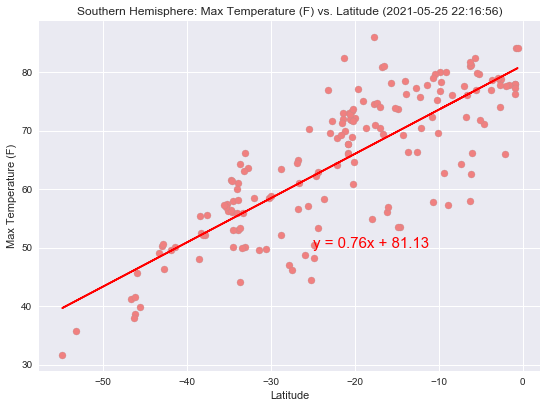

In [49]:
# Create Plot: Temp vs Lat (Southern)
plt.figure(figsize=(8,6))
plt.scatter(southern_hem_df["Latitude"], southern_hem_df["Max Temp."], marker = "o", color="lightcoral", edgecolor="rosybrown")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"Southern Hemisphere: Max Temperature (F) vs. Latitude ({dates_converted[0]})")

# Label plot and annotate the line equation
plt.plot(southern_hem_df["Latitude"], regress_values,"r-")
plt.annotate(line_eq, (-25,50), fontsize=15, color="red")

# Print r square value
print(f'The r-value is: {rvalue**2}')

plt.savefig("./Images/temp_lat_south.png")

# Show plot
plt.show()

### Analysis for Temperature vs. Latitude:
#### Using r-values from 4-22-21

There is a greater correlation between *temperature* and *latitude* in the **Northern Hemisphere** cities than the Southern Hemisphere cities, as the r-value is ***0.80*** for the Northern Hemisphere and ***0.53*** for the Southern Hemisphere. This means that in the Northern Hemisphere, as you get farther away from the equator, it will get colder. As well, in the Southern Hemisphere, as you get closer to the equator, it will most likely get warmer, with some exceptions (since the r-value is not as close to 1). 

# Humidity vs. Latitude

## Northern Hemisphere:

In [50]:
# Perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_hem_df["Latitude"], northern_hem_df["Humidity"])

# Get regression values
regress_values = northern_hem_df["Latitude"] * slope + intercept
print(regress_values)

# Create line equation string
line_eq = f'y = {slope:1.2f}x + {intercept:1.2f}'
print(line_eq)

0      60.082894
1      70.953929
3      70.049426
5      65.580184
8      63.144827
         ...    
524    67.580110
526    68.988439
527    61.672964
529    63.075429
532    70.619718
Name: Latitude, Length: 364, dtype: float64
y = 0.16x + 59.59


The r-value is: 0.015260679127650672


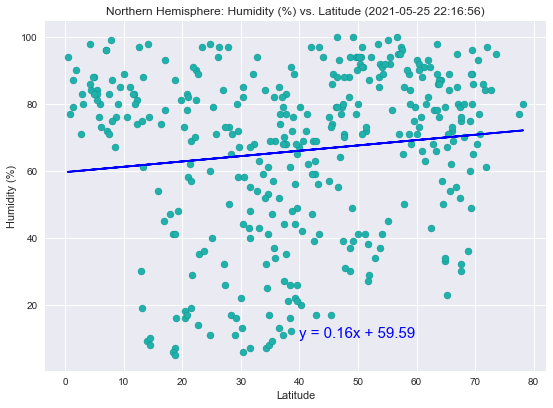

In [51]:
# Create Plot: Humidity vs Lat (Northern)
plt.figure(figsize=(8,6))
plt.scatter(northern_hem_df["Latitude"], northern_hem_df["Humidity"], marker = "o", color="lightseagreen", edgecolor="teal")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Northern Hemisphere: Humidity (%) vs. Latitude ({dates_converted[0]})")

# Label plot and annotate the line equation
plt.plot(northern_hem_df["Latitude"], regress_values,"b-")
plt.annotate(line_eq, (40,10), fontsize=15, color="b")

# Print r square value
print(f'The r-value is: {rvalue**2}')

plt.savefig("./Images/humidity_lat_north.png")

# Show plot
plt.show()

## Southern Hemisphere:

In [52]:
# Perform a linear regression on humidity vs. latitude: Southern
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_hem_df["Latitude"], southern_hem_df["Humidity"])

# Get regression values
regress_values = southern_hem_df["Latitude"] * slope + intercept
print(regress_values)

# Create line equation string
line_eq = f'y = {slope:1.2f}x + {intercept:1.2f}'
print(line_eq)


2      75.492778
4      77.772481
6      67.169889
7      69.492037
14     69.298630
         ...    
522    74.238963
525    72.513719
528    76.678032
530    74.368942
531    76.444670
Name: Latitude, Length: 169, dtype: float64
y = 0.25x + 77.96


The r-value is: 0.00012475513902560596


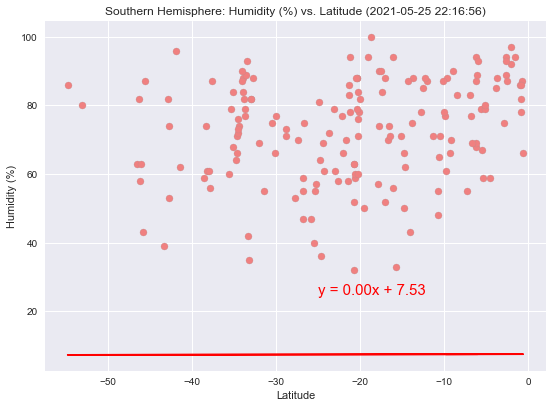

In [64]:
# Create Plot: Humidity vs Lat (Southern)
plt.figure(figsize=(8,6))
plt.scatter(southern_hem_df["Latitude"], southern_hem_df["Humidity"], marker = "o", color="lightcoral", edgecolor="rosybrown")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Southern Hemisphere: Humidity (%) vs. Latitude ({dates_converted[0]})")

# Label plot and annotate the line equation
plt.plot(southern_hem_df["Latitude"], regress_values,"r-")
plt.annotate(line_eq, (-25,25), fontsize=15, color="red")

# Print r square value
print(f'The r-value is: {rvalue**2}')

plt.savefig("./Images/humidity_lat_south.png")

# Show plot
plt.show()

### Analysis for Humidity vs. Latitude:
#### Using r-values from (4-22-21)

For both hemispheres, there is hardly any correlation between *humidity* and *latitude*, since both r-values are close to 0. The northern hemisphere's r-value is *0.045*, which is greater than the southern hemisphere's r-value of *0.0085*, but they are still very low.


# Cloudiness vs. Latitude

## Northern Hemisphere:

In [54]:
# Perform a linear regression on cloudiness vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_hem_df["Latitude"], northern_hem_df["Cloudiness"])

# Get regression values
regress_values = northern_hem_df["Latitude"] * slope + intercept
print(regress_values)

# Create line equation string
line_eq = f'y = {slope:1.2f}x + {intercept:1.2f}'
print(line_eq)

0      56.182162
1      61.298890
3      60.873163
5      58.769601
8      57.623338
         ...    
524    59.710917
526    60.373783
527    56.930569
529    57.590674
532    61.141586
Name: Latitude, Length: 364, dtype: float64
y = 0.08x + 55.95


The r-value is: 0.001390905658085793


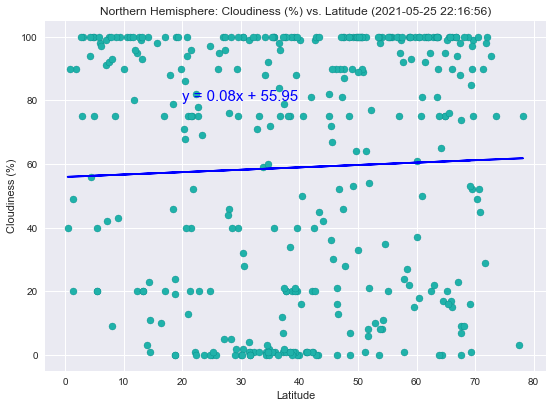

In [55]:
# Create Plot: Cloudiness vs Lat (Northern)
plt.figure(figsize=(8,6))
plt.scatter(northern_hem_df["Latitude"], northern_hem_df["Cloudiness"], marker = "o", color="lightseagreen", edgecolor="teal")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Northern Hemisphere: Cloudiness (%) vs. Latitude ({dates_converted[0]})")

# Label plot and annotate the line equation
plt.plot(northern_hem_df["Latitude"], regress_values,"b-")
plt.annotate(line_eq, (20,80), fontsize=15, color="b")

# Print r square value
print(f'The r-value is: {rvalue**2}')

plt.savefig("./Images/cloudiness_lat_north.png")

# Show plot
plt.show()

## Southern Hemisphere:

In [56]:
# Perform a linear regression on cloudiness vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_hem_df["Latitude"], southern_hem_df["Cloudiness"])

# Get regression values
regress_values = southern_hem_df["Latitude"] * slope + intercept
print(regress_values)

# Create line equation string
line_eq = f'y = {slope:1.2f}x + {intercept:1.2f}'
print(line_eq)

2      52.019253
4      53.201139
6      47.704344
7      48.908236
14     48.807966
         ...    
522    51.369226
525    50.474793
528    52.633734
530    51.436612
531    52.512750
Name: Latitude, Length: 169, dtype: float64
y = 0.13x + 53.30


The r-value is: 0.002068391742360479


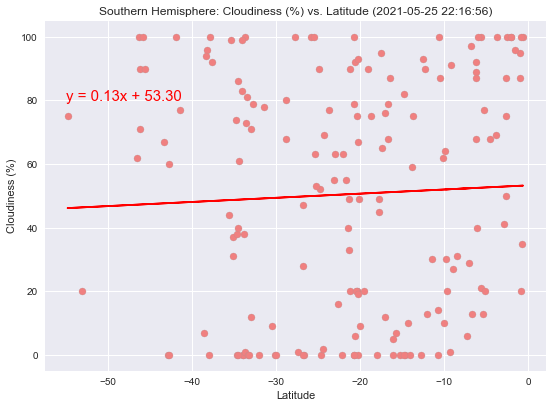

In [57]:
# Create Plot: Cloudiness vs Lat (southern)
plt.figure(figsize=(8,6))
plt.scatter(southern_hem_df["Latitude"], southern_hem_df["Cloudiness"], marker = "o", color="lightcoral", edgecolor="rosybrown")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Southern Hemisphere: Cloudiness (%) vs. Latitude ({dates_converted[0]})")

# Label plot and annotate the line equation
plt.plot(southern_hem_df["Latitude"], regress_values,"r-")
plt.annotate(line_eq, (-55,80), fontsize=15, color="r")

# Print r square value
print(f'The r-value is: {rvalue**2}')

plt.savefig("./Images/cloudiness_lat_south.png")

# Show plot
plt.show()

### Analysis for Cloudiness vs. Latitude:
#### Using r-values from (4-22-21)

For both hemispheres, there is close to no correlation between *cloudiness* and *latitude*. The Northern Hemisphere r-value of *0.045* suggests that there is no correlation between these two factors in that hemisphere. The r-value of the Southern Hemisphere is *0.0008*, which is even lower. This suggests that the cloudiness is not dependent on which degrees of latitude a city is in.


# Wind Speed vs. Latitude

## Northern Hemisphere:

In [58]:
# Perform a linear regression on wind speed vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_hem_df["Latitude"], northern_hem_df["Wind Speed"])

# Get regression values
regress_values = northern_hem_df["Latitude"] * slope + intercept
print(regress_values)

# Create line equation string
line_eq = f'y = {slope:1.2f}x + {intercept:1.2f}'
print(line_eq)

0      8.245077
1      8.780703
3      8.736137
5      8.515934
8      8.395941
         ...   
524    8.614472
526    8.683862
527    8.323421
529    8.392522
532    8.764236
Name: Latitude, Length: 364, dtype: float64
y = 0.01x + 8.22


The r-value is: 0.0005971392924627803


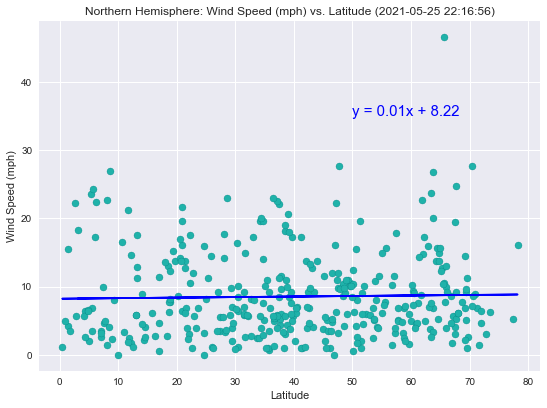

In [59]:
# Create Plot: wind speed vs Lat (Northern)
plt.figure(figsize=(8,6))
plt.scatter(northern_hem_df["Latitude"], northern_hem_df["Wind Speed"], marker = "o", color="lightseagreen", edgecolor="teal")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Northern Hemisphere: Wind Speed (mph) vs. Latitude ({dates_converted[0]})")

# Label plot and annotate the line equation
plt.plot(northern_hem_df["Latitude"], regress_values,"b-")
plt.annotate(line_eq, (50,35), fontsize=15, color="b")

# Print r square value
print(f'The r-value is: {rvalue**2}')

plt.savefig("./Images/windspeed_lat_north.png")

# Show plot
plt.show()

## Southern Hemisphere:

In [60]:
# Perform a linear regression on wind speed vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_hem_df["Latitude"], southern_hem_df["Wind Speed"])

# Get regression values
regress_values = southern_hem_df["Latitude"] * slope + intercept
print(regress_values)

# Create line equation string
line_eq = f'y = {slope:1.2f}x + {intercept:1.2f}'
print(line_eq)

2      7.492084
4      7.528623
6      7.358687
7      7.395905
14     7.392806
         ...   
522    7.471988
525    7.444336
528    7.511081
530    7.474071
531    7.507341
Name: Latitude, Length: 169, dtype: float64
y = 0.00x + 7.53


The r-value is: 0.00012475513902560596


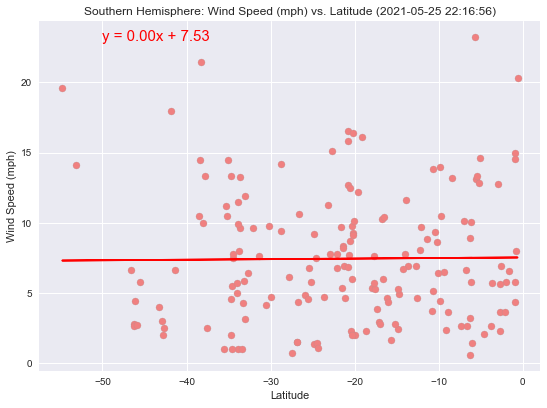

In [61]:
# Create Plot: wind speed vs Lat (southern)
plt.figure(figsize=(8,6))
plt.scatter(southern_hem_df["Latitude"], southern_hem_df["Wind Speed"], marker = "o", color="lightcoral", edgecolor="rosybrown")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Southern Hemisphere: Wind Speed (mph) vs. Latitude ({dates_converted[0]})")

# Label plot and annotate the line equation
plt.plot(southern_hem_df["Latitude"], regress_values,"r-")
plt.annotate(line_eq, (-50,23), fontsize=15, color="red")

# Print r square value
print(f'The r-value is: {rvalue**2}')

plt.savefig("./Images/windspeed_lat_south.png")

# Show plot
plt.show()

### Analysis for Wind Speed vs. Latitude:
#### Using r-values from (4-22-21)

For both hemispheres, there is also close to no correlation between *wind speed* and *latitude*. Both the Northern Hemisphere and the Southern hemisphere have r-values of *0.0008* suggesting there is no correlation between these factors. This means that it doesn't matter which hemisphere you are in, the wind speed varies within each degree of latitude. 